# 机器学习的数学基础

1. 向量$L_0$的范数为向量中非零元素的个数，严格满足向量范数的 3 个性质，是否正确？

A. 错误

B. 正确

**答案：** A

**解答：**

范数是数学中用于度量向量或矩阵“大小”或“长度”的函数。

某个函数是范数，等价于满足以下三个条件：

- **正定性：** 即非负性——$\|\boldsymbol{x}\| \geq 0$，当且仅当$\boldsymbol{x} = \boldsymbol{0}$时，$\|\boldsymbol{x}\| = 0$;;
- **绝对齐次性：** 即向量与其范数的缩放比例一致——$\|a\boldsymbol{x}\| = |a|\|\boldsymbol{x}\|$;
- **满足三角不等式：** $\|\boldsymbol{x} + \boldsymbol{y}\| \leq \|\boldsymbol{x}\| + \|\boldsymbol{y}\|$

范数的具体函数形式可以有很多种定义，只要满足上述三个条件的定义都是范数。

题目中将范数定义为一个向量中非零元素的个数，那么将向量倍乘一个非零的数$k$，范数不会变化，即不满足齐次性，所以该定义下的函数不是范数，选择A。


____

2. 下列说法错误的是： 

A. 两个对角矩阵之间相乘一定可交换。 

B. 矩阵与向量的乘法满足分配律，即对于维度合适的矩阵$\boldsymbol{A}$和$\boldsymbol{x}$、$\boldsymbol{y}$，有$\boldsymbol{A}(\boldsymbol{x} + \boldsymbol{y}) = \boldsymbol{A}\boldsymbol{x} + \boldsymbol{A}\boldsymbol{y}$。

C. 矩阵对向量的点乘满足结合律，即对于维度合适的矩阵$\boldsymbol{A}$和$\boldsymbol{x}$、$\boldsymbol{y}$，有$(\boldsymbol{A}\boldsymbol{x}) \cdot \boldsymbol{y} = \boldsymbol{A}(\boldsymbol{x} \cdot \boldsymbol{y})$。

D. 假设$f$处处可微且存在最大值，那么在最大值点$f$的梯度一定为零。

**答案：** C

**解答：**

对于A选项，设对角矩阵 $ D_1 = \text{diag}(a_1, a_2, \dots, a_n) $ 和 $ D_2 = \text{diag}(b_1, b_2, \dots, b_n) $，则：
$$D_1 D_2 = D_2 D_1 = \text{diag}(a_1b_1, a_2b_2, \dots, a_nb_n)$$

可以看出A选项正确。

In [2]:
# 代码验证：
import numpy as np

# 定义两个对角矩阵D1和D2
D1 = np.diag([1, 2, 3])
D2 = np.diag([4, 5, 6])

# 计算D1和D2的乘积，先乘D1再乘D2
product1 = np.dot(D1, D2)

# 计算D2和D1的乘积，先乘D2再乘D1
product2 = np.dot(D2, D1)

# 输出结果
print("D1 * D2:\n", product1)
print("D2 * D1:\n", product2)

# 检查两个乘积是否相等
print("Are D1 * D2 and D2 * D1 equal? ", np.array_equal(product1, product2))

D1 * D2:
 [[ 4  0  0]
 [ 0 10  0]
 [ 0  0 18]]
D2 * D1:
 [[ 4  0  0]
 [ 0 10  0]
 [ 0  0 18]]
Are D1 * D2 and D2 * D1 equal?  True


对于B选项，两个矩阵可以相加说明两个矩阵行列数目都相同，所以$B$和$C$两个矩阵均符合可以与$A$相乘的条件，B选项正确。

In [5]:
# 代码验证：
import numpy as np

# 定义一个矩阵A
A = np.array([[1, 2], [3, 4]])
# 定义两个向量x和y
x = np.array([1, 2])
y = np.array([3, 4])

# 计算向量x和y的和
x_plus_y = x + y

# 计算矩阵A与向量x的乘积
Ax = A.dot(x)
# 计算矩阵A与向量y的乘积
Ay = A.dot(y)
# 计算矩阵A与向量x和y的和的乘积
A_x_plus_y = A.dot(x_plus_y)

# 输出结果
print("A(x+y):\n", A_x_plus_y)
print("Ax + Ay:\n", Ax + Ay)

# 检查两个乘积是否相等
print("Are they equal? ", np.array_equal(A_x_plus_y, Ax + Ay))

A(x+y):
 [16 36]
Ax + Ay:
 [16 36]
Are they equal?  True


对于C选项，两个向量的内积是一个标量，而标量乘以矩阵相当于将该矩阵中每一个元素倍乘，而$A$和$C$的矩阵维度可能会不同，所以C选项错误。

In [6]:
# 代码验证：
import numpy as np

A = np.array([[1, 2], [3, 4]])

x = np.array([1, 0])
y = np.array([0, 1])

product1 = (A @ x).dot(y)
product2 = x.dot(y) * A

print("Product 1:", product1)
print("Product 2:", product2)

# 检查两个乘积是否相等
print("Are they equal? ", np.array_equal(product1, product2))

Product 1: 3
Product 2: [[0 0]
 [0 0]]
Are they equal?  False


D选项是基本结论，对于一个处处可微的函数，它在极值点处的导数（梯度）值一定为0。

综上所述，选择D项。

____

3. 当 $L_p$ 范数中的 $p \in (0,1)$ 或取 $p \to 0^{+}$ 得到 $L_0$ 范数时，它并不满足范数的定义。依次验证范数的 3 条要求，它违反了哪一条要求？试举出一个违反该要求的例子。



**答案：** 不满足齐次性和三角不等式。

**解答：** 

根据该章节的内容，$L_0$范数定义为向量中非0元素的个数，下面依次探讨范数的三个要求：

- 正定性——满足：对于任意 $\mathbf{x} \neq \mathbf{0}$，$\| \mathbf{x} \|_p = \left( \sum_{i=1}^n |x_i|^p \right)^{1/p} > 0$，且 $\| \mathbf{0} \|_p = 0$
- 齐次性——不满足：习题一已经探讨过
- 三角不等式——不满足：当 $p < 1$ 时，三角不等式不成立。

反例：

取 $\mathbf{x} = (1, 0)$，$\mathbf{y} = (0, 1)$，$p = 0.5$。
- $\| \mathbf{x} \|_{0.5} = \left( 1^{0.5} + 0^{0.5} \right)^{2} = (1 + 0)^2 = 1$。
- $\| \mathbf{y} \|_{0.5} = 1$。
- $\| \mathbf{x} + \mathbf{y} \|_{0.5} = \left( 1^{0.5} + 1^{0.5} \right)^{2} = (1 + 1)^2 = 4$。

显然，$4 > 1 + 1 = 2$，违反三角不等式。


___

4. 证明矩阵的转置和逆满足 $(\boldsymbol{A}^{\mathrm{T}})^{-1} = (\boldsymbol{A}^{-1})^{\mathrm{T}}$。

**数学证明：**

$$A \cdot A^{-1} = I$$
对等式两边取转置：
$$(A \cdot A^{-1})^{\mathrm{T}} = I^{\mathrm{T}}$$
根据矩阵转置的性质 $$(AB)^{\mathrm{T}} = B^{\mathrm{T}} \cdot A^{\mathrm{T}}$$
得 $$(A^{-1})^{\mathrm{T}} \cdot A^{\mathrm{T}} = I$$
因此，
$(A^{-1})^{\mathrm{T}}$ 是 $A^{\mathrm{T}}$ 的逆矩阵，即 $$(A^{\mathrm{T}})^{-1} = (A^{-1})^{\mathrm{T}}$$

In [8]:
# 代码验证：
import numpy as np

# 生成一个可逆的随机矩阵
A = np.random.rand(3, 3)
while np.linalg.det(A) == 0:  # 确保行列式非零
    A = np.random.rand(3, 3)

# 计算转置和逆
A_T = A.T
inv_A = np.linalg.inv(A)
inv_A_T = inv_A.T  # (A^{-1})^T
inv_A_T_2 = np.linalg.inv(A_T)  # (A^T)^{-1}

# 验证两者是否相等
print("是否相等:", np.allclose(inv_A_T, inv_A_T_2))

是否相等: True


___

5. 设二元函数$f(x,y)$ 在 $\mathbb{R}^{2}$ 上处处光滑且可微，证明在任意一点 $(x_0,y_0)$ 处，函数的梯度是函数值上升最快的方向。(提示：考虑函数在该点沿 $(\cos\theta,\sin\theta)$ 的方向导数的长度，何时该长度最大? )

 **数学证明：**
 
 设函数 $f$ 在点 $(x_0, y_0)$ 沿单位向量 $\mathbf{u} = (\cos\theta, \sin\theta)$ 的方向导数为：
 $$D_{\mathbf{u}}f(x_0, y_0) = \nabla f(x_0, y_0) \cdot \mathbf{u} = \frac{\partial f}{\partial x}\cos\theta + \frac{\partial f}{\partial y}\sin\theta $$
 其中，$\nabla f = \left( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right)$ 是梯度向量。

 
根据柯西-施瓦茨不等式：
$$|\nabla f \cdot \mathbf{u}| \leq \|\nabla f\| \cdot \|\mathbf{u}\| = \|\nabla f\| $$

当且仅当 $\mathbf{u}$ 与 $\nabla f$ 同方向时，等号成立，此时方向导数达到最大值 $\|\nabla f\|$。

结论：  

梯度方向 $\nabla f$ 是函数值上升最快的方向。


代码验证：以 $f(x, y) = x^2 + y^2$ 为例，在点 $(1, 1)$ 处计算梯度，并比较沿不同方向的方向导数，验证最大值出现在梯度方向。

梯度方向：θ = 57.30°
方向导数最大值对应的角度：θ = 45.05°


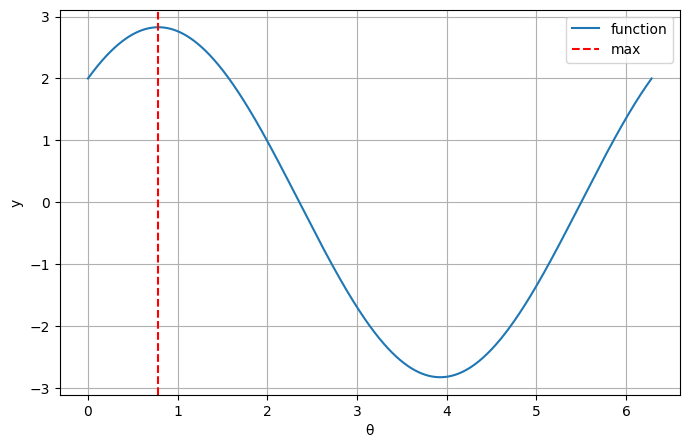

In [12]:
# 代码验证
import numpy as np
import matplotlib.pyplot as plt

# 定义函数及其梯度
def f(x, y):
    return x**2 + y**2

def gradient_f(x, y):
    return np.array([2*x, 2*y])

# 测试点
x0, y0 = 1, 1
grad = gradient_f(x0, y0)
grad_dir = grad / np.linalg.norm(grad)  # 梯度方向的单位向量

# 生成方向向量（单位向量）
theta = np.linspace(0, 2*np.pi, 1000)
directions = np.column_stack((np.cos(theta), np.sin(theta)))

# 计算方向导数
directional_derivatives = np.sum(grad * directions, axis=1)

# 找到最大值对应的角度
max_idx = np.argmax(directional_derivatives)
max_theta = theta[max_idx]

# 输出结果
print(f"梯度方向：θ = {np.degrees(grad_dir[1]/grad_dir[0]):.2f}°")
print(f"方向导数最大值对应的角度：θ = {np.degrees(max_theta):.2f}°")

# 绘制方向导数随角度的变化
plt.figure(figsize=(8, 5))
plt.plot(theta, directional_derivatives, label="function")
plt.axvline(max_theta, color='r', linestyle='--', label="max")
plt.xlabel("θ")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

___

6. 利用向量范数的定义证明，所有的向量范数都是凸函数。

**数学证明：**

证明对于任意向量范数 $\|\cdot\|$，函数 $f(\mathbf{x}) = \|\mathbf{x}\|$ 是凸函数。

凸函数的定义：  

函数 $f$ 是凸函数，当且仅当对任意 $\mathbf{x}, \mathbf{y} \in \mathbb{R}^n$ 和 $\lambda \in [0, 1]$，有：
$$f(\lambda \mathbf{x} + (1-\lambda)\mathbf{y}) \leq \lambda f(\mathbf{x}) + (1-\lambda) f(\mathbf{y}) $$

应用范数的三角不等式：  

对 $\lambda \mathbf{x} + (1-\lambda)\mathbf{y}$ 应用三角不等式：
$$ \|\lambda \mathbf{x} + (1-\lambda)\mathbf{y}\| \leq \|\lambda \mathbf{x}\| + \|(1-\lambda)\mathbf{y}\| $$

利用范数的齐次性：

根据范数的齐次性 $\|\alpha \mathbf{z}\| = |\alpha| \|\mathbf{z}\|$，且 $\lambda, 1-\lambda \geq 0$，得：
$$ \|\lambda \mathbf{x}\| = \lambda \|\mathbf{x}\|, \quad \|(1-\lambda)\mathbf{y}\| = (1-\lambda) \|\mathbf{y}\| $$

将上述结果代入不等式：
$$ \|\lambda \mathbf{x} + (1-\lambda)\mathbf{y}\| \leq \lambda \|\mathbf{x}\| + (1-\lambda) \|\mathbf{y}\| $$

从而，范数 $\|\cdot\|$ 满足凸函数的定义。

In [13]:
# 代码验证：
import numpy as np

def l2_norm(x):
    return np.sqrt(np.sum(x**2))

# 生成随机向量
x = np.random.rand(3)
y = np.random.rand(3)

# 测试凸性：对于任意 λ ∈ [0,1]，验证 l2_norm(λx + (1-λ)y) ≤ λ*l2(x) + (1-λ)*l2(y)
lambda_values = np.linspace(0, 1, 1000)
for lam in lambda_values:
    z = lam * x + (1 - lam) * y
    left = l2_norm(z)
    right = lam * l2_norm(x) + (1 - lam) * l2_norm(y)
    if not np.allclose(left, right, rtol=1e-8, atol=1e-8) and left > right:
        print(f"违反凸性条件在 λ = {lam:.4f}")
        exit()

print("所有测试通过，L2范数满足凸性条件")

所有测试通过，L2范数满足凸性条件


___

7. 是否存在非凸非凹的函数？又凸又凹呢？试举例说明或证明其不存在。

**答案：** 都是存在的。

**解析：**

（1）非凸非凹的函数存在性

存在。许多函数既不是凸函数也不是凹函数。  
例子：三次函数 $f(x) = x^3$。

**分析**：

若 $f''(x) \geq 0$ 对所有 $x$ 成立，则 $f$ 是凸函数。

若 $f''(x) \leq 0$ 对所有 $x$ 成立，则 $f$ 是凹函数。

三次函数的二阶导数：$f''(x) = 6x$。
 - 当 $x > 0$ 时，$f''(x) > 0$，函数局部凸。
 - 当 $x < 0$ 时，$f''(x) < 0$，函数局部凹。
 - 因此，$f(x) = x^3$ 在全局上既不满足凸性也不满足凹性。


（2）既凸又凹的函数存在性

存在。所有仿射函数（形如 $f(\mathbf{x}) = \mathbf{a}^\top \mathbf{x} + b$）既是凸函数又是凹函数。

**证明**：
1. **凸性条件**：  
   对任意 $\mathbf{x}, \mathbf{y} \in \mathbb{R}^n$ 和 $\lambda \in [0, 1]$，
$$
   f(\lambda \mathbf{x} + (1-\lambda)\mathbf{y}) = \mathbf{a}^\top (\lambda \mathbf{x} + (1-\lambda)\mathbf{y}) + b = \lambda (\mathbf{a}^\top \mathbf{x} + b) + (1-\lambda) (\mathbf{a}^\top \mathbf{y} + b) = \lambda f(\mathbf{x}) + (1-\lambda) f(\mathbf{y}).
$$
   因此，$f$ 满足凸性。

2. **凹性条件**：  
   同理，凹性条件要求：
   \[
   f(\lambda \mathbf{x} + (1-\lambda)\mathbf{y}) \geq \lambda f(\mathbf{x}) + (1-\lambda) f(\mathbf{y}).
   \]
   由于等式成立，$f$ 也满足凹性。


**结论：**
- 非凸非凹函数：存在，如三次函数 $f(x) = x^3$。
- 既凸又凹函数：存在，且仅为仿射函数。


In [14]:
# 代码验证——非凹非凸
import numpy as np

def cubic_second_derivative(x):
    return 6 * x

# 测试不同点的二阶导数符号
x_positive = 1.0
x_negative = -1.0
print(f"在 x={x_positive} 处，二阶导数为 {cubic_second_derivative(x_positive)}，函数局部凸")
print(f"在 x={x_negative} 处，二阶导数为 {cubic_second_derivative(x_negative)}，函数局部凹")

在 x=1.0 处，二阶导数为 6.0，函数局部凸
在 x=-1.0 处，二阶导数为 -6.0，函数局部凹


In [15]:
# 代码验证——既凹又凸
def affine_function(x, a, b):
    return np.dot(a, x) + b

# 生成随机向量和参数
x = np.random.rand(3)
y = np.random.rand(3)
a = np.random.rand(3)
b = np.random.rand()

# 验证凸性和凹性（等式成立）
lambda_values = np.linspace(0, 1, 1000)
for lam in lambda_values:
    z = lam * x + (1 - lam) * y
    left = affine_function(z, a, b)
    right = lam * affine_function(x, a, b) + (1 - lam) * affine_function(y, a, b)
    if not np.allclose(left, right):
        print("仿射函数不满足凸性/凹性条件")
        exit()

print("所有测试通过，仿射函数满足凸性和凹性条件")

所有测试通过，仿射函数满足凸性和凹性条件


___

8. 试通过作图来展示，对不同的 $p$ 值，在 2 维画出坐标上画出 $L_p$ 范数等于 1 的向量对应的点构成的曲线。设平面上点的坐标为 $(x,y)$，该曲线的方程就是 $(|x|^{p} + |y|^{p})^{1/p} = 1$ 。通过这些图像来证明和理解一个趋势：$p$ 越小，曲线越贴近坐标轴；$p$ 越大，曲线越远离坐标轴，并且棱角越明显。 

**数学分析：**

对于二维向量 $(x, y)$，$L_p$ 范数等于 1 的曲线方程为：
$$ \left( |x|^p + |y|^p \right)^{1/p} = 1 $$
- 当 $p \to 0^+$ 时：曲线趋近于坐标轴，仅保留非零分量。
- 当 $p = 1$ 时：曲线为菱形（曼哈顿距离）。
- 当 $p = 2$ 时：曲线为单位圆（欧氏距离）。
- 当 $p \to \infty$ 时：曲线趋近于正方形（无穷范数）。

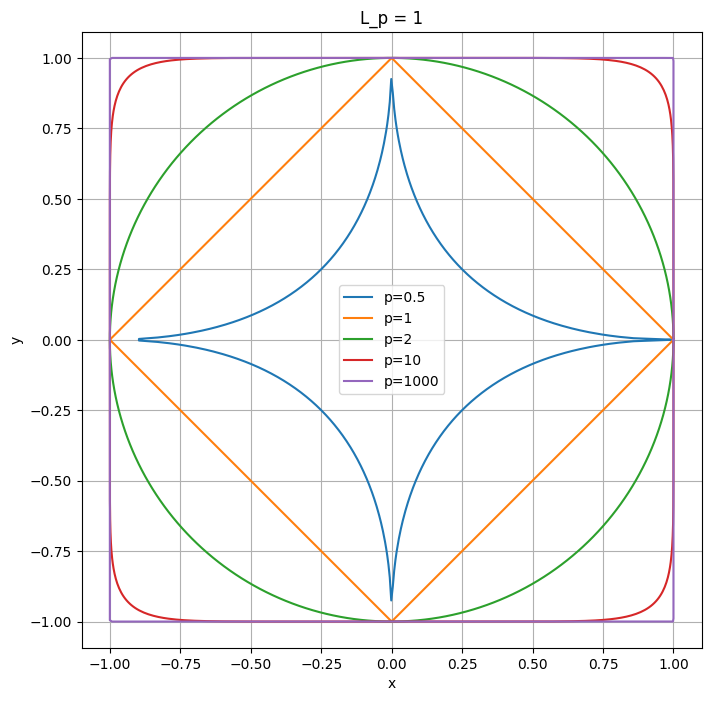

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# 定义不同的 p 值
p_values = [0.5, 1, 2, 10, 1000]  # 1000 近似无穷大

# 生成角度 theta
theta = np.linspace(0, 2 * np.pi, 1000)

# 初始化绘图
plt.figure(figsize=(8, 8))

for p in p_values:
    # 计算 r
    r = 1 / (np.abs(np.cos(theta))**p + np.abs(np.sin(theta))**p)**(1/p)
    # 转换为笛卡尔坐标
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    # 绘制曲线
    plt.plot(x, y, label=f'p={p}')

# 添加图例和标签
plt.xlabel('x')
plt.ylabel('y')
plt.title('L_p = 1')
plt.legend()
plt.axis('equal')  # 保持纵横比相等
plt.grid(True)
plt.show()

**图像分析：**

- $p=0.5$：曲线极度贴近坐标轴，中间凹陷明显。
- $p=1$：菱形，顶点在 $(\pm1, 0)$ 和 $(0, \pm1)$。
- $p=2$：单位圆，各方向均匀分布。
- $p=10$：接近正方形，棱角显著。
- $p=1000$：几乎为正方形，顶点趋近 $(\pm1, \pm1)$。

**结论：**
- $p$ 越小，曲线越贴近坐标轴，因为低次幂对非零分量的惩罚更轻。
- $p$ 越大，曲线越远离坐标轴且棱角分明，因为高次幂迫使非零分量趋近于极值。